In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FPATH = '/home/staff/rippel/MSD/r_bs4_dec/'
os.chdir(FPATH)

In [3]:
with open('Predictions/metrics.json') as fp:
    results = json.load(fp)

In [4]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def get_bxpstats(lstat):
    return({'med': lstat['50pc'],
            'q1':lstat['25pc'],
            'q3':lstat['75pc'],
            'whislo':lstat['min'],
            'whishi':lstat['max']})

In [5]:
FPATH.split('/')[-2]

'r_bs4_dec'

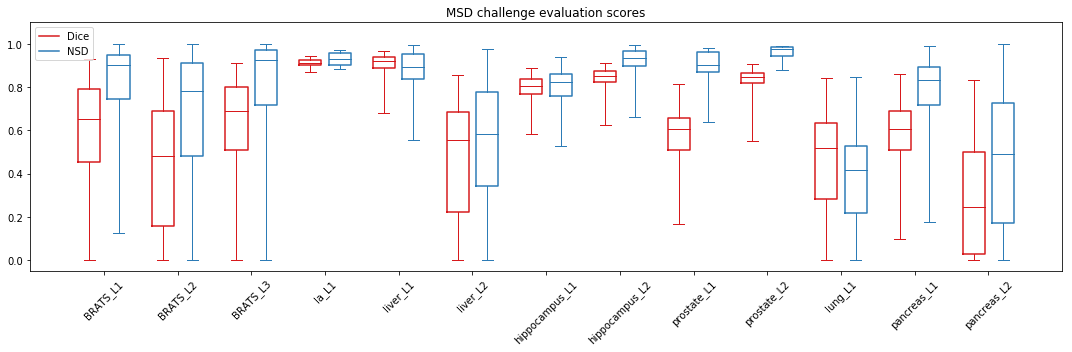

In [6]:
list_DCS = []
list_HSD = []
ticks_all = []

for task, labels in results.items():
   
    ticks = [tick.strip('_DCS') for tick in labels if 'DCS' in tick]
    ticks_all += ticks
    for task in ticks:
        for label, lstats in labels.items():       
            #print(lstats)
            if task in label:
                if '_DCS' in label:
                    list_DCS.append(get_bxpstats(lstats))
                elif'_HSD' in label:
                    list_HSD.append(get_bxpstats(lstats))            
        
fig = plt.figure(figsize=(15,5))
#plt.title('MSD_Challenge {}'.format(FPATH.split('/')[-2]))
plt.title('MSD challenge evaluation scores')
ax = plt.gca()
bpl = ax.bxp(bxpstats = list_DCS, positions=np.array(range(len(list_DCS)))*2.0-0.4, widths=0.6, showfliers=False)
bpr = ax.bxp(bxpstats = list_HSD, positions=np.array(range(len(list_DCS)))*2.0+0.4, widths=0.6, showfliers=False)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Dice')
plt.plot([], c='#2C7BB6', label='NSD')
plt.legend(loc = 2)
plt.xticks(range(0, len(ticks_all) * 2, 2), ticks_all, rotation=45)
plt.xlim(-2, len(ticks_all)*2)
plt.ylim(-0.05,1.1)
plt.tight_layout()
plt.savefig(FPATH.split('/')[-2], format='pdf')